In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_palette(sns.color_palette("Set1", n_colors=8, desat=.5))

In [34]:
# Gradient descent required functions:
# ------------------------------------
def sigmoid(X): 
    return 1 / (1 + np.exp(-X))

def probability(X, weights, bias):
    return sigmoid(np.dot(X, weights) + bias)

def cross_entropy_ave(y, y_hat):
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

# get average gradient of cross entropy loss at all data points in X
def d_Error(X, y, weights, bias):
    y_hat = probability(X, weights, bias)
    d_E_matrix =  (X.T * (y - y_hat)).T  # each row is the loss of that sample
    d_E_d_w = d_E_matrix.mean(axis=0)
    d_E_d_b = (y - y_hat).mean() # gives scalar
    d_E_d_z = np.append(d_E_matrix, d_E_d_b)
#     print('x, y, y_hat:', X, y, y_hat)
#     print('dE/dW:', d_E_matrix)
#     print('dE/db:', d_E_d_b)
#     print('dE/dz:', d_E_d_z)
#     print('weights, b:', weights, bias)
#     print('-------------------')
    return d_E_d_z

def update(X, y, weights, bias, lr):
    dEdz = d_Error(X, y, weights, bias)
    dEdw = dEdz[:-1]
    dEdb = dEdz[-1]
    print(weights.shape)
    print(dEdw.shape)
    weights += lr * dEdw
    bias += lr * dEdb
    return weights, bias

In [38]:
np.random.seed(44)
epochs = 100
learnrate = 0.01

# Train with gradient descent:
def train(X, y, learn_rate, epochs, graph_lines=False):
    
    errors = []
    last_loss = None
    n_samples, n_features = X.shape
    
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    
    for e in range(epochs):
        for x, y_i in zip(X, y):
#             print(f'weights: {weights}, bias: {bias}')
#             print(f'prediction: {probability(x, weights, bias)}')
            weights, bias = update(x, y_i, weights, bias, learn_rate)

        y_hat = probability(X, weights, bias)
        loss = cross_entropy_ave(y, y_hat)
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print(f'------- EPOCH {e} -------')
            if last_loss and last_loss < loss:
                print(f'Train Loss: {loss}, LOSS INCREASING')
            else:
                print(f'Train Loss: {loss}')
            last_loss = loss
            predictions = y_hat > 0.5
            accuracy = np.mean(predictions == y)
            print(f'Accuracy: {accuracy}')
        
    plt.plot(errors)
    
# Plotting Functions: 
# ------------------------------------
def plot_data(data):
    sns.scatterplot(x=0, y=1, hue=2, data=data, legend=False)
    
def plot_lines(m, b, color= 'r--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b)
    
    

In [39]:
data = pd.read_csv('data.csv', header=None)
X = data.iloc[:, :2].to_numpy()
y = data.iloc[:,-1].to_numpy()

------- EPOCH 0 -------
Train Loss: 0.7136804879750506
Accuracy: 0.4
------- EPOCH 10 -------
Train Loss: 0.623451422708032
Accuracy: 0.59
------- EPOCH 20 -------
Train Loss: 0.556233503883487
Accuracy: 0.76
------- EPOCH 30 -------
Train Loss: 0.5032458115981486
Accuracy: 0.84
------- EPOCH 40 -------
Train Loss: 0.46111054109243677
Accuracy: 0.87
------- EPOCH 50 -------
Train Loss: 0.4270776370825209
Accuracy: 0.91
------- EPOCH 60 -------
Train Loss: 0.399156616900068
Accuracy: 0.92
------- EPOCH 70 -------
Train Loss: 0.3759123113311127
Accuracy: 0.93
------- EPOCH 80 -------
Train Loss: 0.3563016876549604
Accuracy: 0.94
------- EPOCH 90 -------
Train Loss: 0.33955722737093974
Accuracy: 0.94


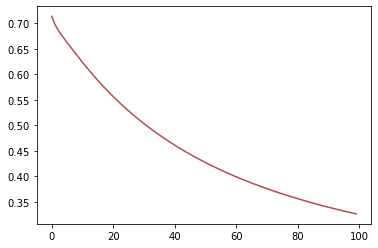

In [40]:
train(X, y, learnrate, epochs)